## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [46]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Iris (Classification)

In [34]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train1, x_test1, y_train1, y_test1 = train_test_split(iris.data, iris.target, test_size=0.3, random_state=4)

# 建立模型
clf1 = DecisionTreeClassifier(
        splitter='random',
        max_depth=3, 
        min_samples_split=5, 
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.2 # 分支的最小權重
)

# 訓練模型
clf1.fit(x_train1, y_train1)

# 預測測試集
y_pred1 = clf1.predict(x_test1)

In [35]:
acc = metrics.accuracy_score(y_test1, y_pred1)
print("Acuuracy: ", acc)

Acuuracy:  0.9777777777777777


In [36]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [37]:
print("Feature importance: ", clf1.feature_importances_)

Feature importance:  [0.         0.         0.52337698 0.47662302]


### Boston (Regression)

In [56]:
# 讀取boston資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train2, x_test2, y_train2, y_test2 = train_test_split(boston.data, boston.target, test_size=0.3, random_state=4)

# 建立模型
clf2 = DecisionTreeRegressor( # 回歸模型專用
#        max_depth=3, 
#        min_samples_split=5, 
#        min_samples_leaf=1,
#        min_weight_fraction_leaf=0.2 # 分支的最小權重
)

# 訓練模型
clf2.fit(x_train2, y_train2)

# 預測測試集
y_pred2 = clf2.predict(x_test2)

In [57]:
#acc = metrics.accuracy_score(y_test2, y_pred2)
#print("Acuuracy: ", acc)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test2, y_pred2))

Mean squared error: 30.10


In [58]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [59]:
print("Feature importance: ", clf2.feature_importances_)

Feature importance:  [0.05044247 0.00168379 0.01809423 0.01186148 0.01492042 0.54985934
 0.01920098 0.06536438 0.00097771 0.01193179 0.02039432 0.00956043
 0.22570865]


### Wine (Classification)

In [60]:
# 讀取wine資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train3, x_test3, y_train3, y_test3 = train_test_split(wine.data, wine.target, test_size=0.3, random_state=4)

# 建立模型
clf3 = DecisionTreeClassifier(
#        max_depth=3, 
#        min_samples_split=5, 
#        min_samples_leaf=1,
#        min_weight_fraction_leaf=0.2 # 分支的最小權重
)

# 訓練模型
clf3.fit(x_train3, y_train3)

# 預測測試集
y_pred3 = clf3.predict(x_test3)

In [61]:
acc = metrics.accuracy_score(y_test3, y_pred3)
print("Acuuracy: ", acc)

Acuuracy:  0.9259259259259259


In [63]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [64]:
print("Feature importance: ", clf3.feature_importances_)

Feature importance:  [0.         0.         0.         0.         0.         0.
 0.3966316  0.         0.         0.39192945 0.         0.
 0.21143895]


## Visualize Decision Tree

### Iris

In [67]:
conda install -c conda-forge pydotplus

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [85]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [86]:
dot_data1 = StringIO()

In [87]:
export_graphviz(clf1, out_file=dot_data1,  
                filled=True, rounded=True,
                special_characters=True)

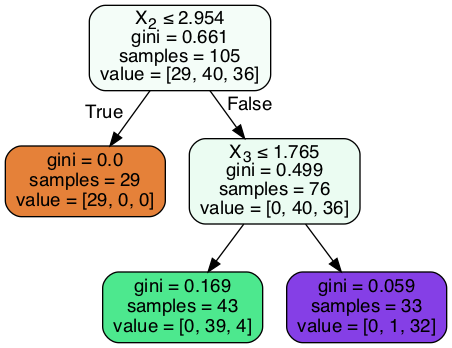

In [88]:
graph1 = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
Image(graph1.create_png())

gini or entropy = 0：全部都是同一類

若該類為0個，則不列入gini or entropy的衡量範圍

與範例相比：

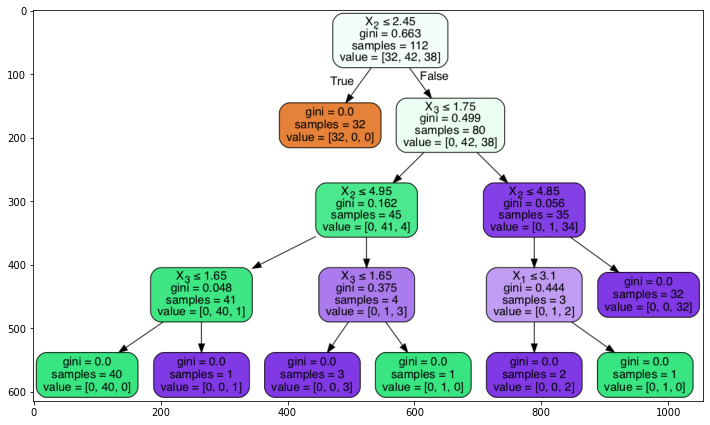

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('../example.png')
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

### Boston

In [89]:
dot_data2 = StringIO()

In [90]:
export_graphviz(clf2, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True)

In [91]:
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

### Wine

In [92]:
dot_data3 = StringIO()

In [96]:
export_graphviz(clf3, out_file=dot_data3,  
                filled=True, rounded=True,
                special_characters=True)

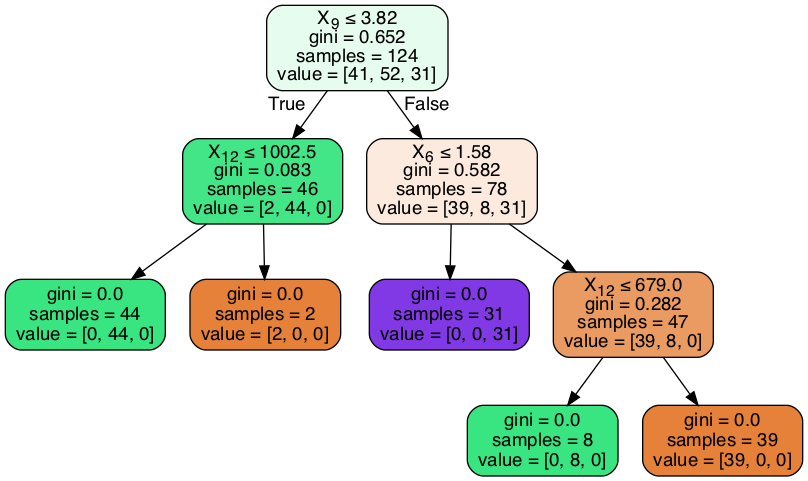

In [97]:
graph3 = pydotplus.graph_from_dot_data(dot_data3.getvalue())  
Image(graph3.create_png())